In [11]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, START, END
from typing import TypedDict


In [21]:

class BMISTATE(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    category: str

In [22]:
def calculate_bmi(state: BMISTATE) -> BMISTATE:
    height = state['height_m']
    weight = state['weight_kg']
    bmi = weight / (height ** 2)
    state['bmi'] = round(bmi, 2)
    return state    

In [23]:
def classify_bmi(state: BMISTATE) -> BMISTATE:
    if state['bmi'] < 18.5:
        state['category'] = 'Underweight'
    elif state['bmi'] < 25:
        state['category'] = 'Normal weight'
    elif state['bmi'] < 30:
        state['category'] = 'Overweight'
    else:
        state['category'] = 'Obesity'
    return state    

In [24]:
graph = StateGraph(BMISTATE)
graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('classify_bmi', classify_bmi)    
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'classify_bmi')
graph.add_edge('classify_bmi', END)

workflow = graph.compile()


In [25]:
workflow.invoke({
    'weight_kg': 70,
    'height_m': 1.75
})


{'weight_kg': 70, 'height_m': 1.75, 'bmi': 22.86, 'category': 'Normal weight'}

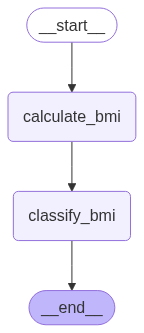

In [26]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())